In [1]:
# Set up parameters to create data for estimation testing
seed <- 23
mu1 <- 0
mu2 <- 9
sd1 <- 1
sd2 <- 1
pi <- 0.7
params <- paste(seed,mu1,mu2,sd1,sd2,pi)

In [4]:
# Results from the EM algorithm
em_call <- paste("python callableEM.py",params)
emResults <- shell(em_call,intern=TRUE)
results <- emResults[1:(length(emResults))]
estMu1EM <- as.numeric(results[1])
estPi1EM <- as.numeric(results[2])
estSd1EM <- as.numeric(results[3])
estMu2EM <- as.numeric(results[4])
estPi2EM <- as.numeric(results[5])
estSd1EM <- as.numeric(results[6])
results

[1] "-0.0597090382166"   "0.699999997242"     "0.9598639732150809"
[4] "8.93523083451"      "0.300000002758"     "0.9662710986143117"

In [8]:
# Resuls from the PSO algorithm
pso_call <- paste("python callablePSO.py",params)
psoResults <- shell(pso_call,intern=TRUE)
results <- psoResults[1:(length(psoResults))]
estMu1PSO <- as.numeric(results[1])
estPi1PSO <- as.numeric(results[2])
estSd1PSO <- as.numeric(results[3])
estMu2PSO <- as.numeric(results[4])
estPi2PSO <- as.numeric(results[5])
estSd1PSO <- as.numeric(results[6])
results

[1] "0.654534062566" "0.565784107168" "1"              "10.05780759"   
[5] "0.434215892832" "1"

In [70]:
# Monte Carl9o simulation

M <- 5


truMu1 <- numeric(M)
truPi1 <- numeric(M)
truSd1 <- numeric(M)
truMu2 <- numeric(M)
truPi2 <- numeric(M)
truSd2 <- numeric(M)


estMu1EM <- numeric(M)
estPi1EM <- numeric(M)
estSd1EM <- numeric(M)
estMu2EM <- numeric(M)
estPi2EM <- numeric(M)
estSd2EM <- numeric(M)

estMu1PSO <- numeric(M)
estPi1PSO <- numeric(M)
estSd1PSO <- numeric(M)
estMu2PSO <- numeric(M)
estPi2PSO <- numeric(M)
estSd2PSO <- numeric(M)

for(i in seq(1,M) ) {
    seed <- round(runif(n=1,min=1,max=100))
    mu1 <- round(runif(n=1,min=0,max=10),digits=2)
    mu2 <- round(runif(n=1,min=11,max=20),digits=2)
    sd1 <- round(runif(n=1,min=1,max=3),digits=2)
    sd2 <- sd1
    pi <- round(runif(n=1,min=0.61,max=0.89),digits=2)
    params <- paste(seed,mu1,mu2,sd1,sd2,pi)
   
    truMu1[i] <- mu1
    truMu2[i] <- mu2
    truPi1[i] <- pi 
    truPi2[i] <- 1 - pi
    truSd1[i] <- sd1
    truSd2[i] <- sd2

    em_call <- paste("python callableEM.py",params)
    emResults <- shell(em_call,intern=TRUE)
    results <- emResults[1:(length(emResults))]
    estMu1EM[i] <- as.numeric(results[1])
    estPi1EM[i] <- as.numeric(results[2])
    estSd1EM[i] <- as.numeric(results[3])
    estMu2EM[i] <- as.numeric(results[4])
    estPi2EM[i] <- as.numeric(results[5])
    estSd2EM[i] <- as.numeric(results[6])

    pso_call <- paste("python callablePSO.py",params)
    psoResults <- shell(pso_call,intern=TRUE)
    results <- psoResults[1:(length(psoResults))]
    estMu1PSO[i] <- as.numeric(results[1])
    estPi1PSO[i] <- as.numeric(results[2])
    estSd1PSO[i] <- as.numeric(results[3])
    estMu2PSO[i] <- as.numeric(results[4])
    estPi2PSO[i] <- as.numeric(results[5])
    estSd2PSO[i] <- as.numeric(results[6])
}

In [71]:
print("True Means")
truMu1
truMu2

print("True Pi")
truPi1
truPi2

print("EM Means")
estMu1EM
estMu2EM
print("EM pi")
estPi1EM
estPi2EM
print("PSO Means")
estMu1PSO
estMu2PSO
print("PSO pi")
estPi1PSO
estPi2PSO



[1] "True Means"


[1] 7.24 8.94 3.89 7.06 0.45

[1] 13.65 16.01 14.00 16.26 19.31

[1] "True Pi"


[1] 0.78 0.79 0.65 0.66 0.63

[1] 0.22 0.21 0.35 0.34 0.37

[1] "EM Means"


[1] 7.2710341 8.9141361 3.9592831 7.1275162 0.4736631

[1] 13.90582 15.77076 13.96169 15.96827 19.22454

[1] "EM pi"


[1] 0.7886479 0.7845756 0.6449545 0.6561619 0.6300002

[1] 0.2113521 0.2154244 0.3550455 0.3438381 0.3699998

[1] "PSO Means"


[1]  7.063253  8.897298 11.457318 13.834800 20.974784

[1] 14.9418587 17.6834025  4.0940495  6.8092572 -0.1772075

[1] "PSO pi"


[1] 0.9782980 0.7037508 0.5843104 0.5843104 0.8629653

[1] 0.02170204 0.29624916 0.41568956 0.41568956 0.13703471

In [72]:
truSd1
truSd2

[1] 1.70 1.91 2.60 2.44 2.40

[1] 1.70 1.91 2.60 2.44 2.40

In [77]:
print("EM")
mean(abs(truMu1 - estMu1EM))
mean(abs(truPi1 - estPi1EM))
# mean(abs(truSd1 - estSd1EM))
mean(abs(truMu2 - estMu2EM))
mean(abs(truPi2 - estPi2EM))
# mean(abs(truSd2 - estSd2EM))

print("PSO")
mean(abs(truMu1 - estMu1PSO ))
mean(abs(truPi1 - estPi1PSO ))
# mean(abs(truSd1 - estSd1PSO ))
mean(abs(truMu2 - estMu2PSO ))
mean(abs(truPi2 - estPi2PSO ))
# mean(abs(truSd2 - estSd2PSO ))

[1] "EM"


[1] 0.04347206

[1] 0.004591225

[1] 0.1821127

[1] 0.004591225

[1] "PSO"


[1] 7.01727

[1] 0.1317783

[1] 8.361832

[1] 0.1317783

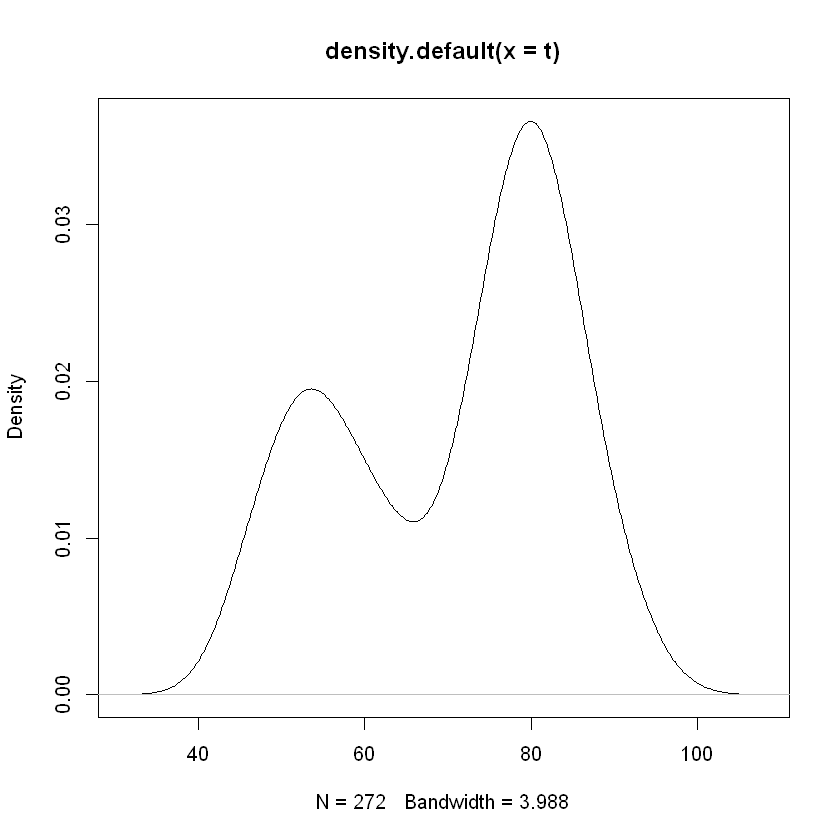

In [87]:
t = faithful[,2]
d = density(t)
plot(d)

In [91]:
sum(t < 65) / 272

[1] 0.3455882

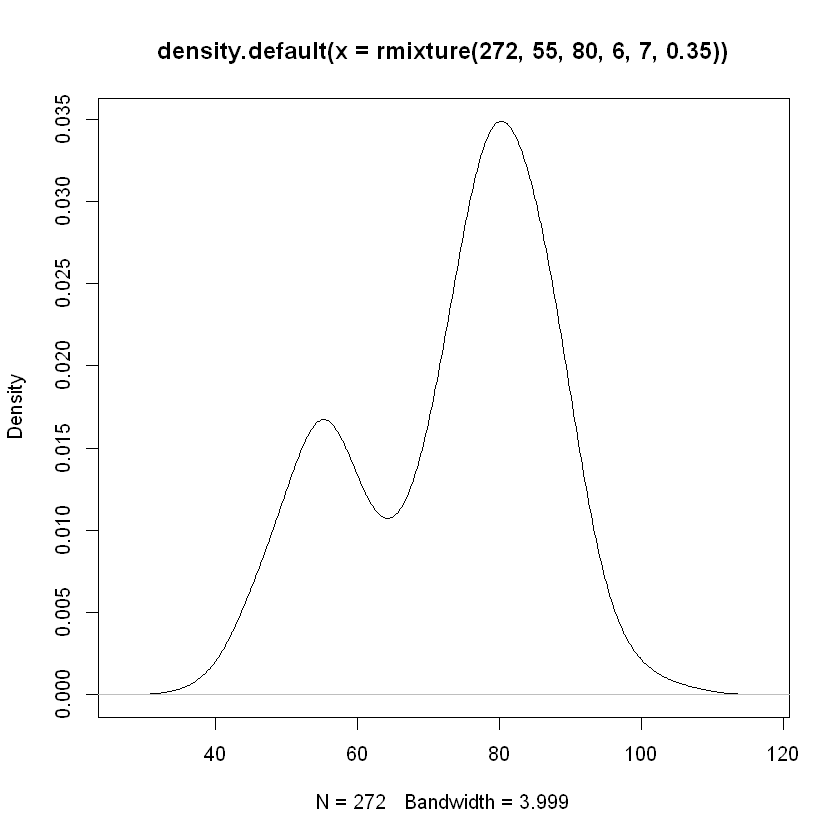

In [113]:

rmixture <- function(n,mu1, mu2, sd1, sd2, pi) {
    u <- runif(n)
    r <- numeric(n)
    
    for(i in seq(1,n)) {
        if(u[i] <= pi) {
            r[i] = rnorm(1, mean = mu1, sd = sd1)
        } else {
            r[i] = rnorm(1, mean = mu2, sd = sd2)
        }
    }

    return(r)
}

#hist(rmixture(10000,0,100,1,1,0.5 ))
d = density(rmixture(272,55,80,6,7,0.35 )  )
plot(d)


